Exploring the deep fields

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
from photometric_models import HG, HG12, HG1G2
from db import query

plt.style.use('science')

filters = ['g', 'r', 'i', 'z']
filter_colors = {'g': '#008060', 'r': '#ff4000', 'i': '#850000', 'z': '#6600cc'}
linestyles = {'g': "--", "r":"-.", "i":":", "z":"-"}


In [14]:
objs = query(
    '''
    SELECT ssObjectId FROM dp03_catalogs_10yr.SSObject as sso WHERE numObs >= 2000
    '''
).to_table().to_pandas()

In [36]:
objs_detections = query(
    f'''
    SELECT eclipticLambda, eclipticBeta FROM dp03_catalogs_10yr.SSSource as sss WHERE sss.ssObjectId IN {tuple(objs["ssObjectId"].to_list())}
    '''
).to_table().to_pandas()

In [37]:
objs_detections.to_csv("./high_objs_detections_coords.csv")

Text(0, 0.5, 'Ecliptic beta [deg]')

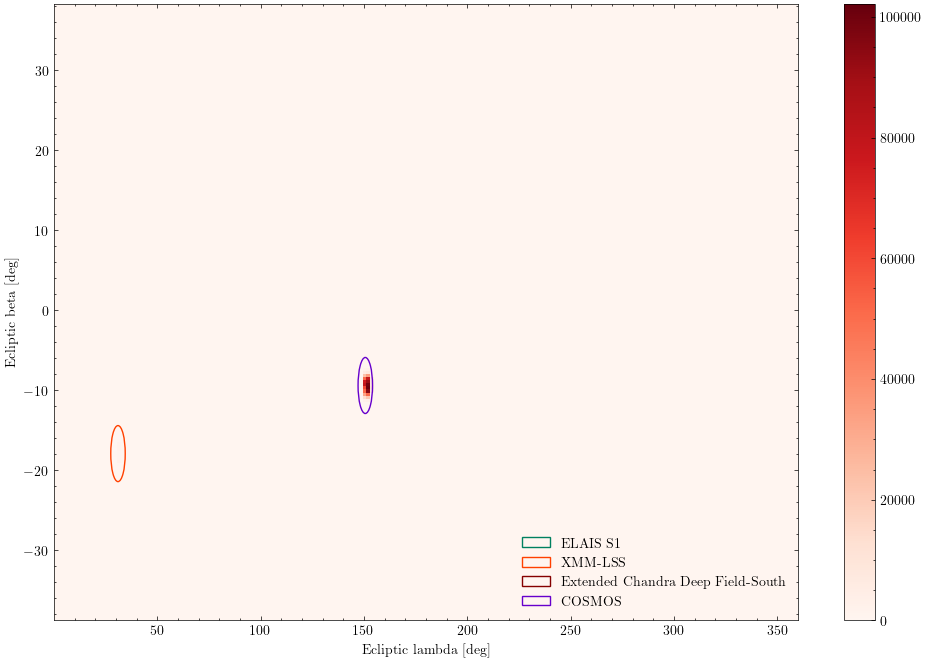

In [78]:
fig, ax = plt.subplots(figsize=(12,8))

h = ax.hist2d(
    objs_detections["eclipticLambda"],
    objs_detections["eclipticBeta"],
    bins=200,
    cmap=mpl.colormaps['Reds']
)
fig.colorbar(h[3], ax=ax)


ddfs = {
    "ELAIS S1": {"el": 345.97, "eb": -43.18},
    "XMM-LSS": {"el": 31.04, "eb": -17.90},
    "Extended Chandra Deep Field-South": {"el": 40.29, "eb": -45.47	},
    "COSMOS": {"el": 150.70, "eb":  -9.39}
} # https://www.lsst.org/scientists/survey-design/ddf #

for i, (ddf, coord) in enumerate(ddfs.items()):
    ax.add_patch(
        plt.Circle((coord["el"], coord["eb"]), 3.5, label=ddf, facecolor="none", edgecolor=list(filter_colors.values())[i])
    )

plt.legend(loc="lower right")
plt.xlabel(
    "Ecliptic lambda [deg]"
)
plt.ylabel(
    "Ecliptic beta [deg]"
)

In [66]:
objs_detections

,eclipticLambda,eclipticBeta
0,152.265943,-8.897459
1,152.617424,-9.005169
2,151.262975,-8.771645
3,151.764587,-9.040691
4,152.615585,-8.991283
...,...,...
1215679,150.388972,-7.972161
1215680,294.703179,9.390112
1215681,151.105137,-9.610322
1215682,151.625018,-9.584741


In [100]:
# For each observation, is this in a deep drilling field?

# Is the ecliptic co-ord within 3.5 deg of x and y

def check_in_ddf(el, eb):
    for ddf, coords in ddfs.items():
        d = np.sqrt((coords["el"] - el)**2 + (coords["eb"] - eb)**2)
        if d <= 3.5:
            return True
    return False

count = 0
for i in range(len(objs_detections)):
    if check_in_ddf(el = objs_detections.iloc[i]["eclipticLambda"], eb=objs_detections.iloc[i]["eclipticBeta"]):
        count +=1

count
  

1059640

In [103]:
print(f"{count} object observations from the highly observed object sample are associated with deep fields, that is {round(100*count/len(objs_detections),2)}% of these object's observations")

1059640 object observations from the highly observed object sample are associated with deep fields, that is 87.16% of these object's observations
